# Introduction

The program is given a bunch of data and it has to detect pattern and relationship on its own. The system has to infer function to describe the pattern from the unclassified (unlabeled) data.

## Goals

- find the underlying structure of a dataset
- summarize and group them most usefully
- effectively represent data in a compressed format

Most common tasks which are performed by unsuperviced learning are clustering/classification.

## Algorithms

- k-means clustering (or Flat Clustering)
- Hierarchical clustering

| Flat Clustering | Hierarchical                   |
|----------------------------|--------------------------------|
|Flat clustering is where the scientist tells the machine how many categories to cluster the data into.|Hierarchical clustering is where the machine is allowed to decide how many clusters to create based on its own algorithms.|


Extra: 
- Cluster postprocessing
- Bisecting k-means

## k-means clustering algorithm

- **Pros**: 
    - Easy to implement
- **Cons**:
    - Can converge at local minima; 
    - slow on very large datasets
- **Needs**
    - Numeric values

**`k-means`** is an algorithm to find `k` clusters (user defined) for a given dataset.

**Centroid**: Centroid in a single point which is used to describe individual clusters. It is at the center of all the points in its respective cluster.

### Algo Working

- **Step 1**: The `k` centroids are randomly assigned to a point
- **Step 2**: Find the closest centroid and assign the individual data point to that centroid
- **Step 3**: Existing centroids are updated by taking the mean value of all the points in their respective cluster

Here’s how the pseudo-code would look:

```Create k points for starting centroids (often randomly)
While any point has changed cluster assignment
    for every point in our dataset:
        for every centroid
            calculate the distance between the centroid and point
        assign the point to the cluster with the lowest distance
    for every cluster calculate the mean of the points in that cluster
        assign the centroid to the mean
```

### General approach to k-means clustering

1. Collect: Any method.
2. Prepare: Numeric values are needed for a distance calculation, and nominal values can be mapped into binary values for distance calculations.
3. Analyze: Any method.
4. Train: Doesn’t apply to unsupervised learning.
5. Test: Apply the clustering algorithm and inspect the results. Quantitative error measurements such as sum of squared error (introduced later) can be used.
6. Use: Anything you wish. Often, the clusters centers can be treated as represen tative data of the whole cluster to make decisions.

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.35s	69555	0.584	0.659	0.619	0.462	0.580	0.148
random   	0.36s	69656	0.680	0.719	0.699	0.570	0.677	0.163
PCA-based	0.04s	70768	0.668	0.695	0.681	0.558	0.665	0.144
__________________________________________________________________________________


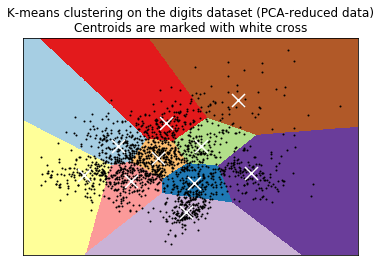

In [2]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Cluster quality metrics evaluated (see Clustering performance evaluation for definitions and discussions of the metrics):

| Shorthand  	| full name                   	|
|------------	|-----------------------------	|
| homo       	| homogeneity score           	|
| compl      	| completeness score          	|
| v-meas     	| V measure                   	|
| ARI        	| adjusted Rand index         	|
| AMI        	| adjusted mutual information 	|
| silhouette 	| silhouette coefficient      	|

## Unsupervised Learning: Dimensionality Reduction and Visualization

###  Dimensionality Reduction: PCA

Dimensionality reduction derives a set of new artificial features smaller than the original feature set. Here we’ll use Principal Component Analysis (PCA), a dimensionality reduction that strives to retain most of the variance of the original data. We’ll use sklearn.decomposition.PCA on the iris dataset:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

 PCA computes linear combinations of the original features using a truncated Singular Value Decomposition of the matrix X, to project the data onto a base of the top singular vectors.

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Once fitted, PCA exposes the singular vectors in the components_ attribute:

In [5]:
pca.components_  

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [5]:
pca.explained_variance_ratio_   

array([ 0.92461621,  0.05301557])

Let us project the iris dataset along those first two dimensions::

In [8]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

In [10]:
print(X_pca[2])

[-1.405936   -0.27905426]


PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

In [7]:
X_pca.mean(axis=0) 
X_pca.std(axis=0)

array([ 0.99666109,  0.99666109])

Furthermore, the samples components do no longer carry any linear correlation:

In [10]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,   6.41562355e-16],
       [  6.41562355e-16,   1.00000000e+00]])

With a number of retained components 2 or 3, PCA is useful to visualize the dataset:

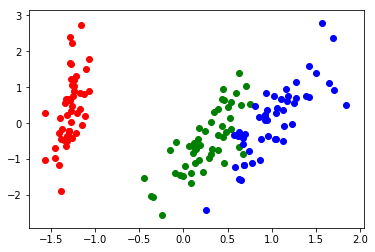

In [11]:
target_ids = range(len(iris.target_names))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):\
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label)
plt.show()

###  Visualization with a non-linear embedding: tSNE

For visualization, more complex embeddings can be useful (for statistical analysis, they are harder to control). sklearn.manifold.TSNE is such a powerful manifold learning method. We apply it to the digits dataset, as the digits are vectors of dimension 8*8 = 64. Embedding them in 2D enables visualization:

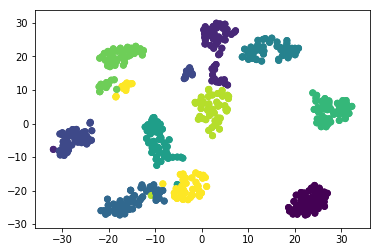

In [13]:
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

# Fit and transform with a TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# Visualize the data
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y) 
plt.show()

## The eigenfaces example: chaining PCA and SVMs

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction. It starts with a didactic but lengthy way of doing things, and finishes with the idiomatic approach to pipelining in scikit-learn.

Here we’ll take a look at a simple facial recognition example. Ideally, we would use a dataset consisting of a subset of the Labeled Faces in the Wild data that is available with sklearn.datasets.fetch_lfw_people(). However, this is a relatively large download (~200MB) so we will do the tutorial on a simpler, less rich dataset. Feel free to explore the LFW dataset.

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

ModuleNotFoundError: No module named 'tarfile1'

## Spam classifier

In [30]:
import os
import tarfile


files = ["20030228_easy_ham.tar.bz2", "20050311_spam_2.tar.bz2"]
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    for filename in (files):
        path = os.path.join(SPAM_PATH, filename)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [31]:
fetch_spam_data()

datasets/spam/20030228_easy_ham.tar.bz2
datasets/spam/20050311_spam_2.tar.bz2


In [34]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam_2")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [36]:
print(len(ham_filenames), len(spam_filenames))

2500 1396


In [41]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam_2" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [42]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [43]:
print(spam_emails[6].get_content().strip())

NEW PRODUCT ANNOUNCEMENT

From: OUTSOURCE ENG.& MFG. INC.


Sir/Madam;

This note is to inform you of new watchdog board technology for maintaining
continuous unattended operation of PC/Servers etc. that we have released for
distribution.
  
We are proud to announce Watchdog Control Center featuring MAM (Multiple
Applications Monitor) capability.
The key feature of this application enables you to monitor as many
applications as you
have resident on any computer as well as the operating system for
continuous unattended operation.  The Watchdog Control Center featuring
MAM capability expands third party application "control" of a Watchdog as
access to the application's
source code is no longer needed.

Here is how it all works:
Upon installation of the application and Watchdog, the user may select
many configuration options, based on their model of Watchdog, to fit their
operational needs.  If the MAM feature is enabled, the user may select any
executable program that they wish for monit

In [ ]:
print(ham_emails[1].get_content().strip())

In [44]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [45]:

from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [46]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [47]:
structures_counter(spam_emails).most_common()

[('text/plain', 597),
 ('text/html', 589),
 ('multipart(text/plain, text/html)', 114),
 ('multipart(text/html)', 29),
 ('multipart(text/plain)', 25),
 ('multipart(multipart(text/html))', 18),
 ('multipart(multipart(text/plain, text/html))', 5),
 ('multipart(text/plain, application/octet-stream, text/plain)', 3),
 ('multipart(text/html, text/plain)', 2),
 ('multipart(text/html, image/jpeg)', 2),
 ('multipart(multipart(text/plain), application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/jpeg)',
  1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/gif)',
  1),
 ('text/plain charset=us-ascii', 1),
 ('multipart(multipart(text/html), image/gif)', 1),
 ('multipart(multipart(text/plain, text/html), application/octet-stream, application/octet-stream, applic

It seems that the ham emails are more often plain text, while spam has quite a lot of HTML. Moreover, quite a few ham emails are signed using PGP, while no spam is. In short, it seems that the email structure is a usual information to have.

Now let's take a look at the email headers:

In [48]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <ilug-admin@linux.ie>
Delivered-To : yyyy@localhost.netnoteinc.com
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 9E1F5441DD	for <jm@localhost>; Tue,  6 Aug 2002 06:48:09 -0400 (EDT)
Received : from phobos [127.0.0.1]	by localhost with IMAP (fetchmail-5.9.0)	for jm@localhost (single-drop); Tue, 06 Aug 2002 11:48:09 +0100 (IST)
Received : from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g72LqWv13294 for    <jm-ilug@jmason.org>; Fri, 2 Aug 2002 22:52:32 +0100
Received : from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org    (8.9.3/8.9.3) with ESMTP id WAA31224; Fri, 2 Aug 2002 22:50:17 +0100
Received : from bettyjagessar.com (w142.z064000057.nyc-ny.dsl.cnc.net    [64.0.57.142]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id WAA31201 for    <ilug@linux.ie>; Fri, 2 Aug 2002 22:50:11 +0100
X-Authentication-Warning : lugh.tuatha.org: Host w142.z0640

In [49]:
spam_emails[0]["Subject"]

'[ILUG] STOP THE MLM INSANITY'

Okay, before we learn too much about the data, let's not forget to split it into a training set and a test set:

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Okay, let's start writing the preprocessing functions. First, we will need a function to convert HTML to plain text. Arguably the best way to do this would be to use the great BeautifulSoup library, but I would like to avoid adding another dependency to this project, so let's hack a quick & dirty solution using regular expressions (at the risk of un̨ho͞ly radiańcé destro҉ying all enli̍̈́̂̈́ghtenment). The following function first drops the <head> section, then converts all <a> tags to the word HYPERLINK, then it gets rid of all HTML tags, leaving only the plain text. For readability, it also replaces multiple newlines with single newlines, and finally it unescapes html entities (such as &gt; or &nbsp;):

In [51]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

Let's see if it works. This is HTML spam:

In [52]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<html>
<head>
</head>
<body>

<center>
<font face="times" size="6" color="#000000">Save up to

<font color="#ff0000">75%</font> on your Term Life
Insurance!</font>
<br>  
<font face="times" size="4" color="#000000">
<i>Compare rates from top insurance companies around
the country</i></font>
<br><br>
<font face="arial" size="4" color="#7084D6">
<b>In our life and times, it's important to plan for
your family's future, while 
<br>being comfortable financially.  Choose the right
Life Insurance policy today.</font>
<p>
<font face="arial" size="3" color="#000000">
<i>Click the link below to compare the lowest rates
and save up to <font
color="#ff0000">75%</font></i></b></font>  
<p>
<a
href="http://www.marketing-leader.com/user0202/termquotes/473400/index.htm"><font
face="arial"
size="4">
<b>COMPARE YOUR COVERAGE</b></font></a>
<p>
<font face="times" size="5" color="#000000">
You'll be able to compare rates and get a free
application in <i>less than a minute!</i></font>
<p>
<font face="aria

In [53]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the country
In our life and times, it's important to plan for
your family's future, while
being comfortable financially.  Choose the right
Life Insurance policy today.
Click the link below to compare the lowest rates
and save up to 75%
 HYPERLINK
COMPARE YOUR COVERAGE
You'll be able to compare rates and get a free
application in less than a minute!
*Get your FREE instant quotes...
*Compare the lowest prices, then...
*Select a company and Apply Online.
 HYPERLINK
GET A FREE QUOTE NOW!
You can't predict the future, but you can always
prepare for it.
 HYPERLINK to be
excluded from future contacts
cocol
http://xent.com/mailman/listinfo/fork
 ...


In [54]:

def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [55]:
print(email_to_text(sample_html_spam)[:100], "...")


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the c ...



Let's throw in some stemming! For this to work, you need to install the Natural Language Toolkit (NLTK). It's as simple as running the following command (don't forget to activate your virtualenv first; if you don't have one, you will likely need administrator rights, or use the --user option):



In [56]:
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Error: stemming requires the NLTK module.


In [57]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

Error: replacing URLs requires the urlextract module.


We are ready to put all this together into a transformer that we will use to convert emails to word counters. Note that we split sentences into words using Python's split() method, which uses whitespaces for word boundaries. This works for many written languages, but not all. For example, Chinese and Japanese scripts generally don't use spaces between words, and Vietnamese often uses spaces even between syllables. It's okay in this exercise, because the dataset is (mostly) in English.

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

Let's try this transformer on a few emails:

In [59]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([ Counter({'NUMBER': 10, 'to': 4, 'a': 4, 'the': 4, 'ubi': 2, 'china': 2, 'for': 2, 'local': 2, 'url': 1, 'http': 1, 'www': 1, 'newsisfree': 1, 'com': 1, 'click': 1, 'date': 1, 'NUMBERtNUMBER': 1, 'had': 1, 'always': 1, 'wanted': 1, 'make': 1, 'pc': 1, 'game': 1, 'market': 1, 'but': 1, 'number': 1, 'factors': 1, 'kept': 1, 'idea': 1, 'on': 1, 'hold': 1, 'in': 1, 'january': 1, 'right': 1, 'incentive': 1, 'motivate': 1, 'try': 1, 'project': 1, 'finally': 1, 'arrived': 1, 'license': 1, 'music': 1, 'up': 1, 'popular': 1, 'animated': 1, 'property': 1}),
       Counter({'NUMBER': 9, 'to': 5, 'you': 5, 'the': 4, 'of': 4, 'this': 3, 'not': 3, 'email': 3, 'receive': 3, 'our': 3, 'offers': 3, 'hyperlink': 2, 'plan': 2, 'at': 2, 'and': 2, 'number': 2, 'is': 2, 'in': 2, 'are': 2, 'by': 2, 's': 2, 'sign': 1, 'up': 1, 'for': 1, 'full': 1, 'access': 1, 'medical': 1, 'llc': 1, 'applicant': 1, 'must': 1, 'be': 1, 'least': 1, 'pay': 1, 'a': 1, 'one': 1, 'time': 1, 'enrollment': 1, 'fee': 1, 'regar

This looks about right!

Now we have the word counts, and we need to convert them to vectors. For this, we will build another transformer whose fit() method will build the vocabulary (an ordered list of the most common words) and whose transform() method will use the vocabulary to convert word counts to vectors. The output is a sparse matrix.

In [60]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.most_common_ = most_common
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [61]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [62]:
X_few_vectors.toarray()

array([[ 42,  10,   4,   4,   0,   4,   2,   0,   1,   0,   0],
       [115,   9,   5,   4,   4,   1,   1,   1,   2,   5,   1],
       [246,  28,   9,   9,  10,   6,   6,   7,   4,   2,   6]], dtype=int64)


What does this matrix mean? Well, the 65 in the third row, first column, means that the third email contains 65 words that are not part of the vocabulary. The 0 next to it means that the first word in the vocabulary is not present in this email. The 1 next to it means that the second word is present once, and so on. You can look at the vocabulary to know which words we are talking about. The first word is "the", the second word is "of", etc.

In [63]:
vocab_transformer.vocabulary_

{'NUMBER': 1,
 'a': 5,
 'for': 6,
 'in': 8,
 'it': 10,
 'of': 4,
 'that': 7,
 'the': 3,
 'to': 2,
 'you': 9}

We are now ready to train our first spam classifier! Let's transform the whole dataset:

In [65]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.9749759384023099, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ....................... , score=0.9884504331087585, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ....................... , score=0.9797687861271677, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished


0.98106505254607868

Over 98.7%, not bad for a first try! :) However, remember that we are using the "easy" dataset. You can try with the harder datasets, the results won't be so amazing. You would have to try multiple models, select the best ones and fine-tune them using cross-validation, and so on.

But you get the picture, so let's stop now, and just print out the precision/recall we get on the test set:

from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression()
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred)))

## Reference
- https://www.coursera.org/learn/machine-learning
- https://github.com/ageron/handson-ml
- https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb
- https://www.datacamp.com/courses/unsupervised-learning-in-python